<a href="https://colab.research.google.com/github/MatiasBlanco0/MNIST-Neural-Network/blob/main/MNIST_Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esta red neuronal esta diseñada para resolver el problema de reconocer un dígito dibujado a mano en una imagen donde el fondo es negro y el dígito es blanco. Utilizamos el dataset de [mnist](http://yann.lecun.com/exdb/mnist/) para entrenar a la red neuronal.

# Librerías

In [ ]:
!pip3 install keras-visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from keras_visualizer import visualizer
from IPython.display import display

# Código

Setear las seeds

In [ ]:
np.random.seed(1)
tf.random.set_seed(1)

## Cargar el dataset de mnist que trae keras y separarlo entre test y training

In [ ]:
mnist = keras.datasets.mnist.load_data(path='mnist.npz')
training_data = mnist[0]
test_data = mnist[1]

11490434/11490434 [==============================] - 0s 0us/step


## Visualizar una imagen del dataset

Cada elemento de `test_data` es una tupla, primero estan los inputs (10000, 28, 28) y despues los outputs (10000).

Label:
7
Imagen:


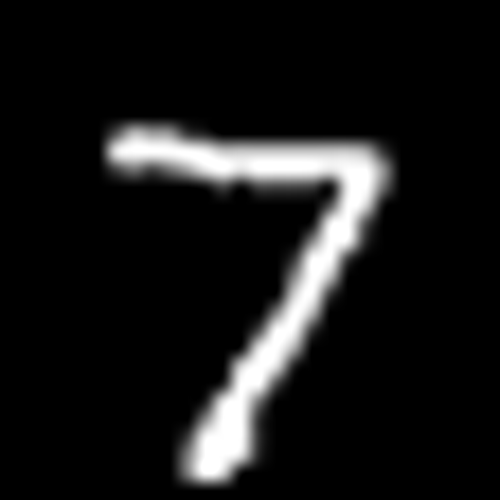

In [ ]:
index = 0
print("Label:")
print(test_data[1][index])
print("Imagen:")
Image.fromarray((test_data[0][index]).astype(np.uint8)).resize((500,500))

## Separar los datos de training a los inputs y outputs

Esta función recibe un array y lo "aplana". Si recibe un array de shape (1, 28, 28), devuelve uno de shape (1, 784)

In [ ]:
def flatten_inputs(arr):
  result = []
  for x in arr:
    result.append(np.ravel(x))
  return np.array(result)

`.to_categorical` convierte los outputs de un número a un array de 10 de largo dónde la posición en el número es 1 y el resto 0.
```
input: 3
output: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
```
Usamos `flatten_inputs` para "aplanar" el array de (batch_size, 28, 28) a (batch_size, 784).
Dividimos los inputs por 255 para normalizar los valores entre 0 y 1.
Modificamos la shape para que sea de (batch_size, 784, 1).

In [ ]:
training_outputs = keras.utils.to_categorical(training_data[1], 10)
test_outputs = keras.utils.to_categorical(test_data[1], 10)
training_inputs = np.expand_dims(flatten_inputs(training_data[0])/255, -1)
test_inputs = np.expand_dims(flatten_inputs(test_data[0])/255, -1)

## Crear y compilar el modelo

El modelo tiene 4 layers, la input layer que recibe un array de shape (784, 1), se pasa a una layer de 128 neuronas, ese se lo pasa a otra de 64 neuronas y, por último, esta la output layer que tiene 10 neuronas, 1 por dígito (0 a 9).

In [ ]:
model = keras.models.Sequential()

model.add(keras.layers.Input(784))
model.add(keras.layers.Dense(128, activation=tf.nn.relu, name="Hidden_1"))
model.add(keras.layers.Dense(64, activation=tf.nn.relu, name="Hidden_2"))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax, name="Output"))

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy(),
             keras.metrics.FalseNegatives()]
)

## Visualizar las funciones de activación

Utilizamos las funciones de activacion reLU porque encontramos que era una buena funcion de activación y también usamos softmax para la utima layer, ya que, según lo que investigamos, es mejor para trabajos de multi-clasificación

reLU:
$$f(x) = max(0, x)$$
Esta función en resumen es un if donde si x es mayor a 0, se devuelve x, pero si es menor o igual a 0 se devuelve 0.

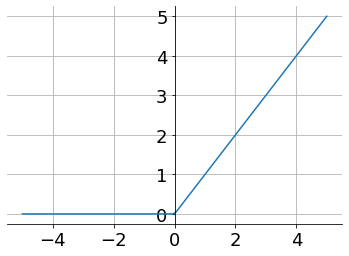

In [ ]:
x = np.linspace(-5, 5, 100)
y = tf.nn.relu(x)

figure = plt.figure()
axis = figure.add_subplot(1, 1, 1)

axis.spines['left'].set_position('center')

axis.spines['right'].set_color('none')
axis.spines['top'].set_color('none')

plt.plot(x, y)
plt.locator_params(axis='y')
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.grid()

softmax:
$$f(x_i) = \frac{\exp(x_i)}{\sum_j \exp(x_j)}$$
Esta función calcula la distribución de probabilidades del evento sobre 'n' eventos diferentes. En términos generales, esta función calculará las probabilidades de cada clase objetivo sobre todas las clases objetivo posibles.

[Referencia](https://dataaspirant.com/difference-between-softmax-function-and-sigmoid-function/)

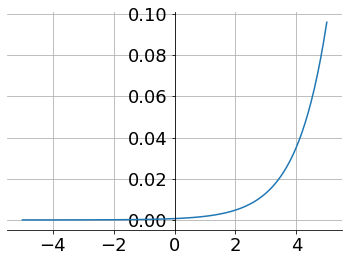

In [ ]:
x = np.linspace(-5, 5, 100)
y = tf.nn.softmax(x)

figure = plt.figure()
axis = figure.add_subplot(1, 1, 1)

axis.spines['left'].set_position('center')

axis.spines['right'].set_color('none')
axis.spines['top'].set_color('none')

plt.plot(x, y)
plt.locator_params(axis='y')
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.grid()

## Visualizar la Red Neuronal

784 inputs a 128 neuronas, la cantidad de parametros se calcula haciendo $neuronasLayer1 * neuronasLayer2 + neuronasLayer2$, la multiplicación representa los pesos y la suma los bias. En este caso es $784 * 128 + 128 = 100480$

Después es lo mismo para las siguientes layers, $128 * 64 + 64 = 8256$ y $64 * 10 + 64 = 650$

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_1 (Dense)            (None, 128)               100480    
                                                                 
 Hidden_2 (Dense)            (None, 64)                8256      
                                                                 
 Output (Dense)              (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


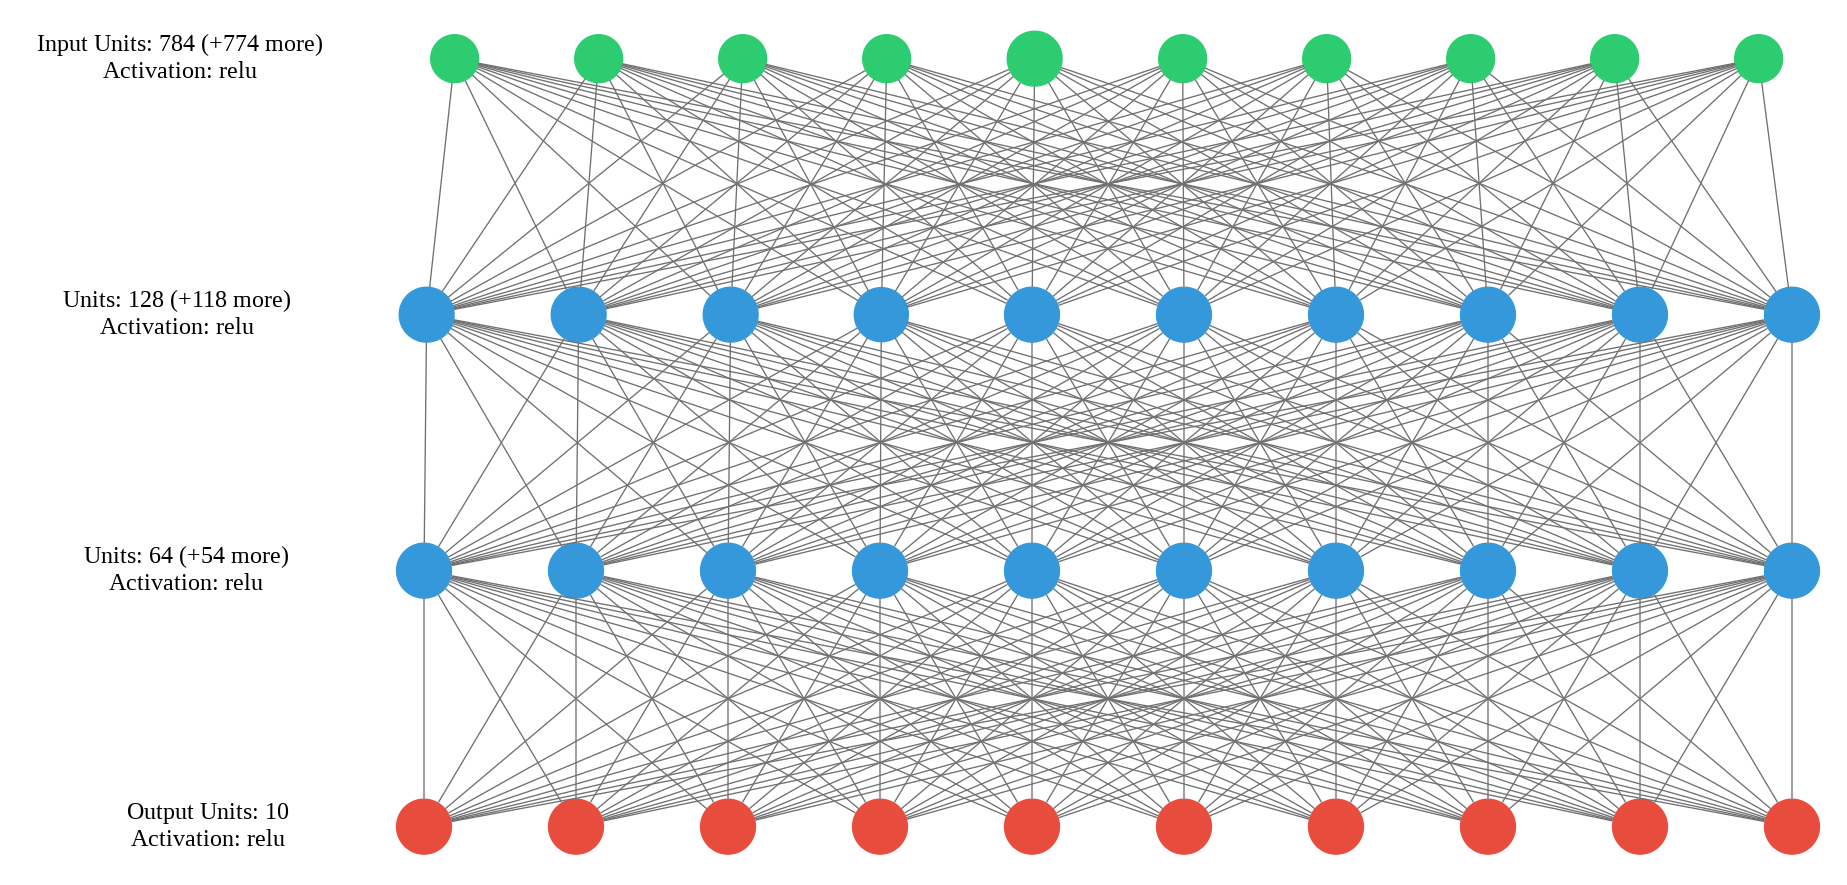

In [ ]:
visualizer(model, filename="red", format="png", view=True)
Image.open("red.png")

## Entrenar la I.A.

La manera en la que se entrena una IA es que se agarran todos los datos de training, se pasan estos datos por la IA, se calcula el cost o el loss, comparando con los resultados esperados, y utilizando backpropagation se puede calcular que pesos modificar y cuanto.

Hay 50 epochs, el batch size es 6000 y hay 60000 casos, es decir, en cada epoch se hacen 10 batch. Usamos los datos de validación pasando `test_inputs` y `test_outputs` como una tupla.

In [ ]:
model.fit(
    x=training_inputs,
    y=training_outputs,
    batch_size=6000,
    epochs=50,
    verbose="auto",
    callbacks=None,
    validation_split=0.0,
    validation_data=(test_inputs, test_outputs),
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False
)

Epoch 1/50
10/10 [==============================] - 2s 115ms/step - loss: 0.4911 - binary_accuracy: 0.9000 - false_negatives: 60000.0000 - val_loss: 0.3305 - val_binary_accuracy: 0.9000 - val_false_negatives: 10000.0000
Epoch 2/50
10/10 [==============================] - 1s 89ms/step - loss: 0.3033 - binary_accuracy: 0.9031 - false_negatives: 57995.0000 - val_loss: 0.2631 - val_binary_accuracy: 0.9090 - val_false_negatives: 8997.0000
Epoch 3/50
10/10 [==============================] - 1s 89ms/step - loss: 0.2324 - binary_accuracy: 0.9166 - false_negatives: 49238.0000 - val_loss: 0.2015 - val_binary_accuracy: 0.9331 - val_false_negatives: 6503.0000
Epoch 4/50
10/10 [==============================] - 1s 81ms/step - loss: 0.1841 - binary_accuracy: 0.9429 - false_negatives: 32091.0000 - val_loss: 0.1614 - val_binary_accuracy: 0.9540 - val_false_negatives: 4079.0000
Epoch 5/50
10/10 [==============================] - 1s 84ms/step - loss: 0.1499 - binary_accuracy: 0.9582 - false_negatives: 2

## Hacer una predicción

Subir la imagen para hacer la predicción. Que la resolución sea cuadrada, preferiblemente un múltiplo de 28

In [ ]:
uploaded = files.upload()

Saving dos.png to dos (2).png


Poner el nombre del archivo de la imagen en `nombre_im` y si la imagen tiene un fondo claro poner `True` en `fondo_blanco`, sino poner `False`

In [ ]:
# Nombre del archivo
nombre_im = "dos.png"
# Poner True si tiene un fondo blanco, sino False
fondo_blanco = True

Se prepara la imagen para la IA, ya que la imagen tiene que tener el fondo negro y el dígito en blanco

In [ ]:
# Abrir la imagen y convertir a grayscale
im = Image.open(nombre_im).convert('L')
# Cambiar el tamaño de la imagen a 28x28
im_resize = im.resize((28,28))
# Convertir a un array de numpy
im_arr = np.array(im_resize)

if(fondo_blanco):
  # Invertir el color de la imagen
  mask = np.full(im_arr.shape, 255)
  im_arr = mask - im_arr
  im_arr = im_arr.astype(np.uint8)
# Mostrar la imagen que se va a enviar a la IA
print("Imagen que recibe la IA:")
Image.fromarray(im_arr)

Imagen que recibe la IA:


La manera en la que la que la IA "predice" el resultado de un input es, los valores que se pasan como input representan la activación de las neuronas de input, despues se calcula la activación de cada neurona de la siguiente layer haciendo:
$$\sum{x\times w + b}$$
al resultado de esto se le aplica la función de activación de la layer y esto representa la activación de esta neurona. Este paso se repite hasta terminar con todas las neuronas de output

Acá se hace la predicción

In [ ]:
# Se divide im_arr por 255 para que los valores esten entre 0 y 1
# Se le agrega una dimension al array que representa la imagen, para que la shape sea (1, 28, 28)
# Se pasa ese array por una funcion llamada flatten_inputs, creada anteriormente, que devuelve un array con shape (1, 784)
prediction = model.predict(flatten_inputs(np.expand_dims(im_arr/255, axis=0)))
print("La IA piensa que el digito de la imagen es un:")
# El array que representa a los resultados es un array de 10 elementos, donde cada elemento es un numero del 0 al 1
# argmax() devuelve el index del elemento del array con mayor valor
print(prediction.argmax())

# convertir el array a una lista de python, por alguna razon era una lista de lista ([[datos]]), por eso el [0]
predictions = prediction.tolist()[0]
# convertir a un diccionario de pares numero: confianza
predictions_dict = {i : predictions[i] for i in range(len(predictions))}

print("Ranking (digito: confianza en porcentaje):")
# la funcion sorted los ordena por el valor, en vez de que ordene por la key de los pares. De manera ascendente
for x in sorted(predictions_dict.items(), key=lambda item: item[1], reverse=True):
  # Se muestra como numero: confianza en porcentaje
  print(str(x[0]) + ": " + str(x[1]*100) + "%")

1/1 [==============================] - 0s 62ms/step
La IA piensa que el digito de la imagen es un:
2
Ranking (digito: confianza en porcentaje):
2: 81.1731219291687%
3: 16.5999174118042%
0: 1.871773786842823%
1: 0.17087962478399277%
5: 0.10890391422435641%
6: 0.04045765963383019%
8: 0.016679945110809058%
7: 0.01189440954476595%
4: 0.005224596679909155%
9: 0.0011566113244043663%


## Buscar los casos erroneos y calcular el margen de error

**Tarda 1 minuto**

Lo que hace este bloque de codigo es mostrar y contar la cantidad de veces que la IA se equivoca

Buscar casos erroneos

Error N° 1:


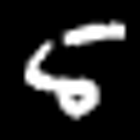

Respuesta de la IA:
6
Resultado esperado: 
5

Error N° 2:


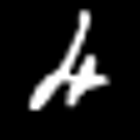

Respuesta de la IA:
2
Resultado esperado: 
4

Error N° 3:


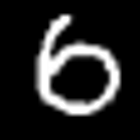

Respuesta de la IA:
0
Resultado esperado: 
6

Error N° 4:


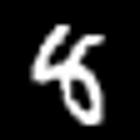

Respuesta de la IA:
4
Resultado esperado: 
8

Error N° 5:


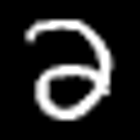

Respuesta de la IA:
3
Resultado esperado: 
2

Error N° 6:


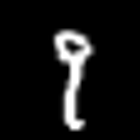

Respuesta de la IA:
7
Resultado esperado: 
9

Error N° 7:


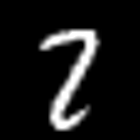

Respuesta de la IA:
7
Resultado esperado: 
2

Error N° 8:


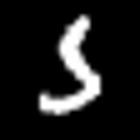

Respuesta de la IA:
3
Resultado esperado: 
5

Error N° 9:


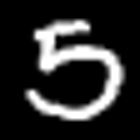

Respuesta de la IA:
0
Resultado esperado: 
5

Error N° 10:


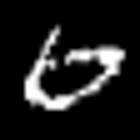

Respuesta de la IA:
0
Resultado esperado: 
6

Error N° 11:


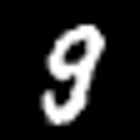

Respuesta de la IA:
8
Resultado esperado: 
9

Error N° 12:


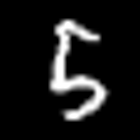

Respuesta de la IA:
8
Resultado esperado: 
5

Error N° 13:


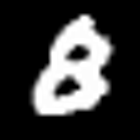

Respuesta de la IA:
0
Resultado esperado: 
8

Error N° 14:


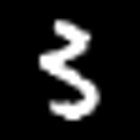

Respuesta de la IA:
5
Resultado esperado: 
3

Error N° 15:


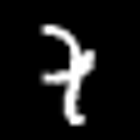

Respuesta de la IA:
1
Resultado esperado: 
7

Error N° 16:


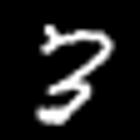

Respuesta de la IA:
2
Resultado esperado: 
3

Error N° 17:


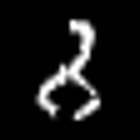

Respuesta de la IA:
2
Resultado esperado: 
8

Error N° 18:


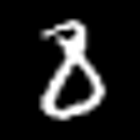

Respuesta de la IA:
3
Resultado esperado: 
8

Error N° 19:


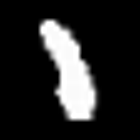

Respuesta de la IA:
8
Resultado esperado: 
1

Error N° 20:


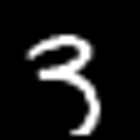

Respuesta de la IA:
9
Resultado esperado: 
3

Error N° 21:


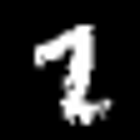

Respuesta de la IA:
8
Resultado esperado: 
2

Error N° 22:


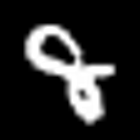

Respuesta de la IA:
4
Resultado esperado: 
8

Error N° 23:


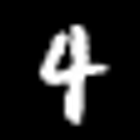

Respuesta de la IA:
9
Resultado esperado: 
4

Error N° 24:


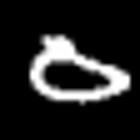

Respuesta de la IA:
6
Resultado esperado: 
0

Error N° 25:


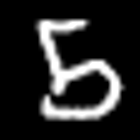

Respuesta de la IA:
8
Resultado esperado: 
5

Error N° 26:


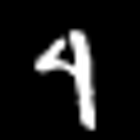

Respuesta de la IA:
9
Resultado esperado: 
4

Error N° 27:


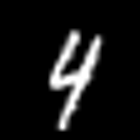

Respuesta de la IA:
9
Resultado esperado: 
4

Error N° 28:


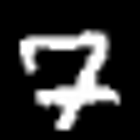

Respuesta de la IA:
2
Resultado esperado: 
7

Error N° 29:


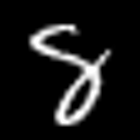

Respuesta de la IA:
7
Resultado esperado: 
8

Error N° 30:


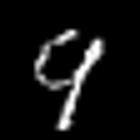

Respuesta de la IA:
7
Resultado esperado: 
9

Error N° 31:


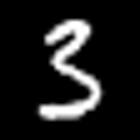

Respuesta de la IA:
5
Resultado esperado: 
3

Error N° 32:


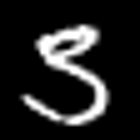

Respuesta de la IA:
5
Resultado esperado: 
3

Error N° 33:


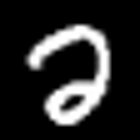

Respuesta de la IA:
0
Resultado esperado: 
2

Error N° 34:


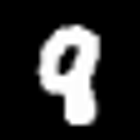

Respuesta de la IA:
9
Resultado esperado: 
8

Error N° 35:


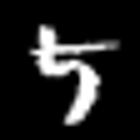

Respuesta de la IA:
4
Resultado esperado: 
5

Error N° 36:


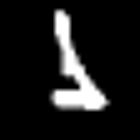

Respuesta de la IA:
2
Resultado esperado: 
1

Error N° 37:


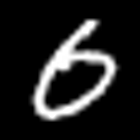

Respuesta de la IA:
0
Resultado esperado: 
6

Error N° 38:


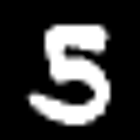

Respuesta de la IA:
3
Resultado esperado: 
5

Error N° 39:


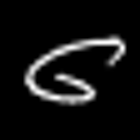

Respuesta de la IA:
5
Resultado esperado: 
6

Error N° 40:


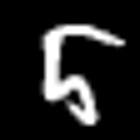

Respuesta de la IA:
8
Resultado esperado: 
5

Error N° 41:


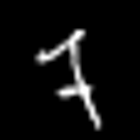

Respuesta de la IA:
2
Resultado esperado: 
7

Error N° 42:


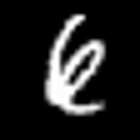

Respuesta de la IA:
8
Resultado esperado: 
6

Error N° 43:


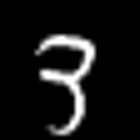

Respuesta de la IA:
7
Resultado esperado: 
3

Error N° 44:


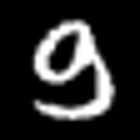

Respuesta de la IA:
8
Resultado esperado: 
9

Error N° 45:


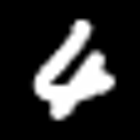

Respuesta de la IA:
6
Resultado esperado: 
4

Error N° 46:


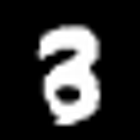

Respuesta de la IA:
8
Resultado esperado: 
3

Error N° 47:


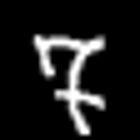

Respuesta de la IA:
8
Resultado esperado: 
7

Error N° 48:


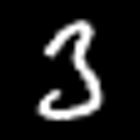

Respuesta de la IA:
5
Resultado esperado: 
3

Error N° 49:


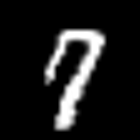

Respuesta de la IA:
9
Resultado esperado: 
7

Error N° 50:


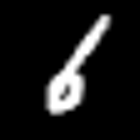

Respuesta de la IA:
1
Resultado esperado: 
6

Error N° 51:


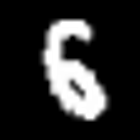

Respuesta de la IA:
8
Resultado esperado: 
6

Error N° 52:


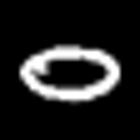

Respuesta de la IA:
7
Resultado esperado: 
0

Error N° 53:


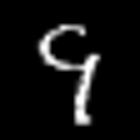

Respuesta de la IA:
4
Resultado esperado: 
9

Error N° 54:


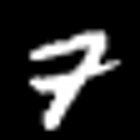

Respuesta de la IA:
9
Resultado esperado: 
7

Error N° 55:


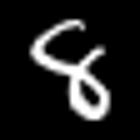

Respuesta de la IA:
4
Resultado esperado: 
8

Error N° 56:


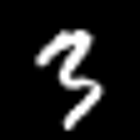

Respuesta de la IA:
9
Resultado esperado: 
3

Error N° 57:


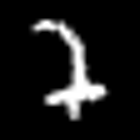

Respuesta de la IA:
2
Resultado esperado: 
7

Error N° 58:


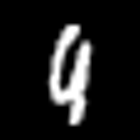

Respuesta de la IA:
4
Resultado esperado: 
9

Error N° 59:


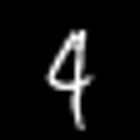

Respuesta de la IA:
9
Resultado esperado: 
4

Error N° 60:


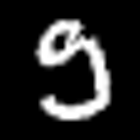

Respuesta de la IA:
0
Resultado esperado: 
9

Error N° 61:


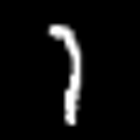

Respuesta de la IA:
1
Resultado esperado: 
7

Error N° 62:


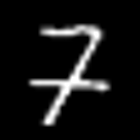

Respuesta de la IA:
2
Resultado esperado: 
7

Error N° 63:


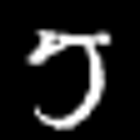

Respuesta de la IA:
7
Resultado esperado: 
5

Error N° 64:


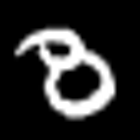

Respuesta de la IA:
3
Resultado esperado: 
8

Error N° 65:


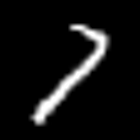

Respuesta de la IA:
1
Resultado esperado: 
7

Error N° 66:


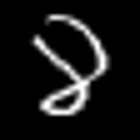

Respuesta de la IA:
2
Resultado esperado: 
8

Error N° 67:


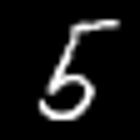

Respuesta de la IA:
6
Resultado esperado: 
5

Error N° 68:


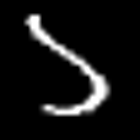

Respuesta de la IA:
3
Resultado esperado: 
5

Error N° 69:


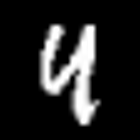

Respuesta de la IA:
9
Resultado esperado: 
4

Error N° 70:


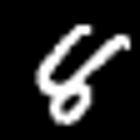

Respuesta de la IA:
4
Resultado esperado: 
8

Error N° 71:


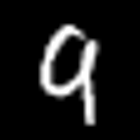

Respuesta de la IA:
4
Resultado esperado: 
9

Error N° 72:


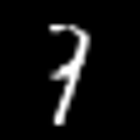

Respuesta de la IA:
1
Resultado esperado: 
7

Error N° 73:


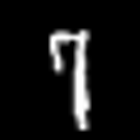

Respuesta de la IA:
9
Resultado esperado: 
7

Error N° 74:


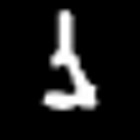

Respuesta de la IA:
6
Resultado esperado: 
1

Error N° 75:


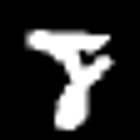

Respuesta de la IA:
7
Resultado esperado: 
8

Error N° 76:


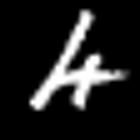

Respuesta de la IA:
6
Resultado esperado: 
4

Error N° 77:


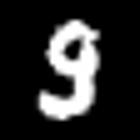

Respuesta de la IA:
3
Resultado esperado: 
9

Error N° 78:


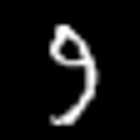

Respuesta de la IA:
3
Resultado esperado: 
9

Error N° 79:


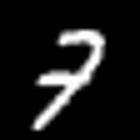

Respuesta de la IA:
9
Resultado esperado: 
7

Error N° 80:


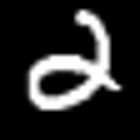

Respuesta de la IA:
6
Resultado esperado: 
2

Error N° 81:


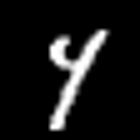

Respuesta de la IA:
7
Resultado esperado: 
4

Error N° 82:


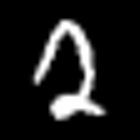

Respuesta de la IA:
0
Resultado esperado: 
2

Error N° 83:


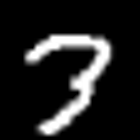

Respuesta de la IA:
7
Resultado esperado: 
3

Error N° 84:


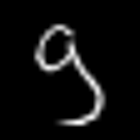

Respuesta de la IA:
3
Resultado esperado: 
9

Error N° 85:


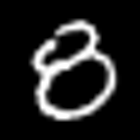

Respuesta de la IA:
0
Resultado esperado: 
8

Error N° 86:


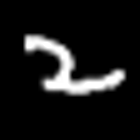

Respuesta de la IA:
4
Resultado esperado: 
2

Error N° 87:


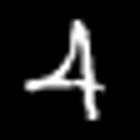

Respuesta de la IA:
2
Resultado esperado: 
4

Error N° 88:


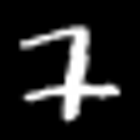

Respuesta de la IA:
2
Resultado esperado: 
7

Error N° 89:


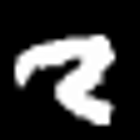

Respuesta de la IA:
8
Resultado esperado: 
2

Error N° 90:


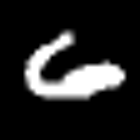

Respuesta de la IA:
4
Resultado esperado: 
6

Error N° 91:


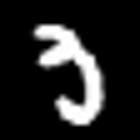

Respuesta de la IA:
5
Resultado esperado: 
3

Error N° 92:


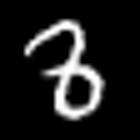

Respuesta de la IA:
3
Resultado esperado: 
8

Error N° 93:


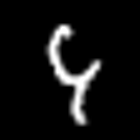

Respuesta de la IA:
4
Resultado esperado: 
9

Error N° 94:


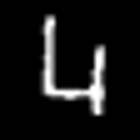

Respuesta de la IA:
6
Resultado esperado: 
4

Error N° 95:


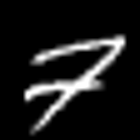

Respuesta de la IA:
4
Resultado esperado: 
7

Error N° 96:


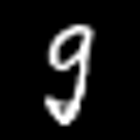

Respuesta de la IA:
8
Resultado esperado: 
9

Error N° 97:


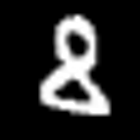

Respuesta de la IA:
2
Resultado esperado: 
8

Error N° 98:


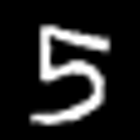

Respuesta de la IA:
3
Resultado esperado: 
5

Error N° 99:


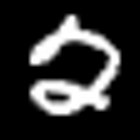

Respuesta de la IA:
0
Resultado esperado: 
2

Error N° 100:


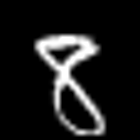

Respuesta de la IA:
9
Resultado esperado: 
8

Error N° 101:


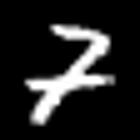

Respuesta de la IA:
2
Resultado esperado: 
7

Error N° 102:


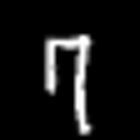

Respuesta de la IA:
9
Resultado esperado: 
7

Error N° 103:


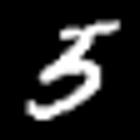

Respuesta de la IA:
3
Resultado esperado: 
5

Error N° 104:


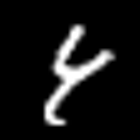

Respuesta de la IA:
8
Resultado esperado: 
4

Error N° 105:


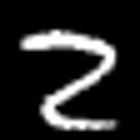

Respuesta de la IA:
7
Resultado esperado: 
2

Error N° 106:


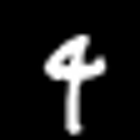

Respuesta de la IA:
9
Resultado esperado: 
4

Error N° 107:


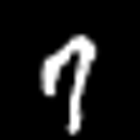

Respuesta de la IA:
9
Resultado esperado: 
7

Error N° 108:


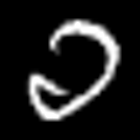

Respuesta de la IA:
0
Resultado esperado: 
2

Error N° 109:


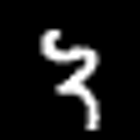

Respuesta de la IA:
7
Resultado esperado: 
3

Error N° 110:


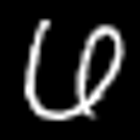

Respuesta de la IA:
0
Resultado esperado: 
6

Error N° 111:


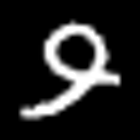

Respuesta de la IA:
8
Resultado esperado: 
9

Error N° 112:


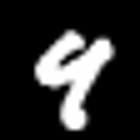

Respuesta de la IA:
9
Resultado esperado: 
4

Error N° 113:


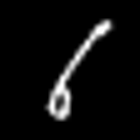

Respuesta de la IA:
1
Resultado esperado: 
6

Error N° 114:


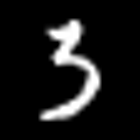

Respuesta de la IA:
5
Resultado esperado: 
3

Error N° 115:


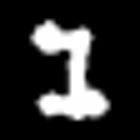

Respuesta de la IA:
2
Resultado esperado: 
1

Error N° 116:


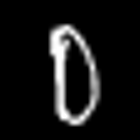

Respuesta de la IA:
5
Resultado esperado: 
0

Error N° 117:


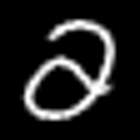

Respuesta de la IA:
3
Resultado esperado: 
2

Error N° 118:


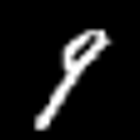

Respuesta de la IA:
1
Resultado esperado: 
9

Error N° 119:


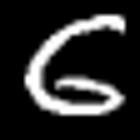

Respuesta de la IA:
5
Resultado esperado: 
6

Error N° 120:


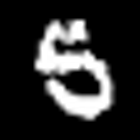

Respuesta de la IA:
6
Resultado esperado: 
5

Error N° 121:


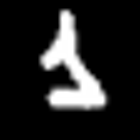

Respuesta de la IA:
6
Resultado esperado: 
1

Error N° 122:


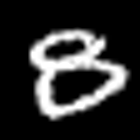

Respuesta de la IA:
0
Resultado esperado: 
8

Error N° 123:


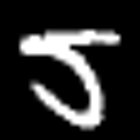

Respuesta de la IA:
7
Resultado esperado: 
5

Error N° 124:


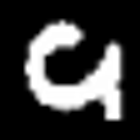

Respuesta de la IA:
6
Resultado esperado: 
9

Error N° 125:


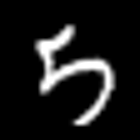

Respuesta de la IA:
9
Resultado esperado: 
5

Error N° 126:


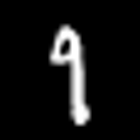

Respuesta de la IA:
1
Resultado esperado: 
9

Error N° 127:


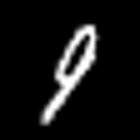

Respuesta de la IA:
1
Resultado esperado: 
9

Error N° 128:


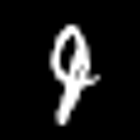

Respuesta de la IA:
4
Resultado esperado: 
9

Error N° 129:


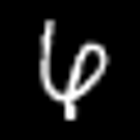

Respuesta de la IA:
4
Resultado esperado: 
6

Error N° 130:


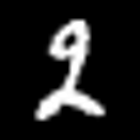

Respuesta de la IA:
1
Resultado esperado: 
2

Error N° 131:


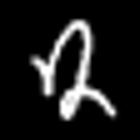

Respuesta de la IA:
4
Resultado esperado: 
2

Error N° 132:


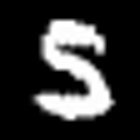

Respuesta de la IA:
3
Resultado esperado: 
5

Error N° 133:


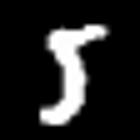

Respuesta de la IA:
8
Resultado esperado: 
5

Error N° 134:


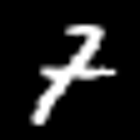

Respuesta de la IA:
1
Resultado esperado: 
7

Error N° 135:


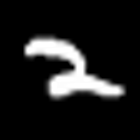

Respuesta de la IA:
7
Resultado esperado: 
2

Error N° 136:


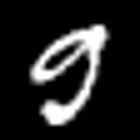

Respuesta de la IA:
0
Resultado esperado: 
9

Error N° 137:


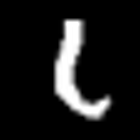

Respuesta de la IA:
1
Resultado esperado: 
6

Error N° 138:


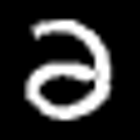

Respuesta de la IA:
3
Resultado esperado: 
2

Error N° 139:


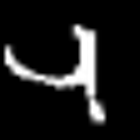

Respuesta de la IA:
7
Resultado esperado: 
4

Error N° 140:


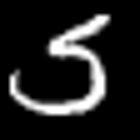

Respuesta de la IA:
3
Resultado esperado: 
5

Error N° 141:


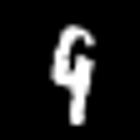

Respuesta de la IA:
4
Resultado esperado: 
9

Error N° 142:


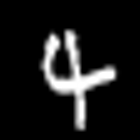

Respuesta de la IA:
7
Resultado esperado: 
4

Error N° 143:


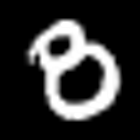

Respuesta de la IA:
0
Resultado esperado: 
8

Error N° 144:


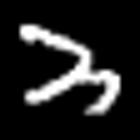

Respuesta de la IA:
2
Resultado esperado: 
3

Error N° 145:


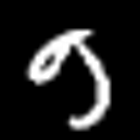

Respuesta de la IA:
5
Resultado esperado: 
9

Error N° 146:


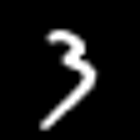

Respuesta de la IA:
7
Resultado esperado: 
3

Error N° 147:


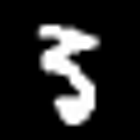

Respuesta de la IA:
5
Resultado esperado: 
3

Error N° 148:


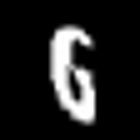

Respuesta de la IA:
8
Resultado esperado: 
6

Error N° 149:


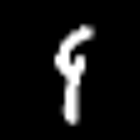

Respuesta de la IA:
1
Resultado esperado: 
9

Error N° 150:


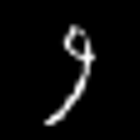

Respuesta de la IA:
7
Resultado esperado: 
9

Error N° 151:


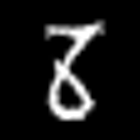

Respuesta de la IA:
3
Resultado esperado: 
8

Error N° 152:


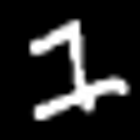

Respuesta de la IA:
2
Resultado esperado: 
1

Error N° 153:


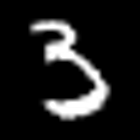

Respuesta de la IA:
5
Resultado esperado: 
3

Error N° 154:


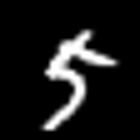

Respuesta de la IA:
9
Resultado esperado: 
5

Error N° 155:


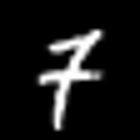

Respuesta de la IA:
1
Resultado esperado: 
7

Error N° 156:


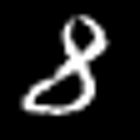

Respuesta de la IA:
3
Resultado esperado: 
8

Error N° 157:


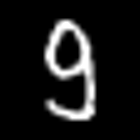

Respuesta de la IA:
8
Resultado esperado: 
9

Error N° 158:


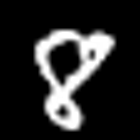

Respuesta de la IA:
7
Resultado esperado: 
8

Error N° 159:


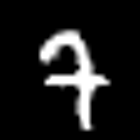

Respuesta de la IA:
9
Resultado esperado: 
7

Error N° 160:


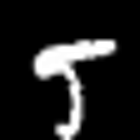

Respuesta de la IA:
7
Resultado esperado: 
5

Error N° 161:


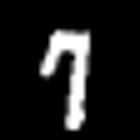

Respuesta de la IA:
9
Resultado esperado: 
7

Error N° 162:


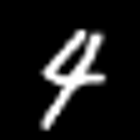

Respuesta de la IA:
9
Resultado esperado: 
4

Error N° 163:


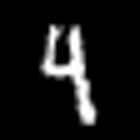

Respuesta de la IA:
9
Resultado esperado: 
4

Error N° 164:


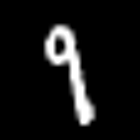

Respuesta de la IA:
1
Resultado esperado: 
9

Error N° 165:


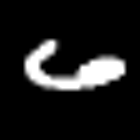

Respuesta de la IA:
4
Resultado esperado: 
6

Error N° 166:


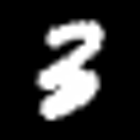

Respuesta de la IA:
2
Resultado esperado: 
3

Error N° 167:


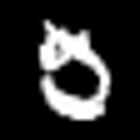

Respuesta de la IA:
0
Resultado esperado: 
5

Error N° 168:


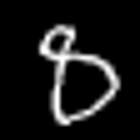

Respuesta de la IA:
5
Resultado esperado: 
8

Error N° 169:


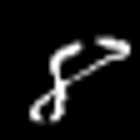

Respuesta de la IA:
5
Resultado esperado: 
8

Error N° 170:


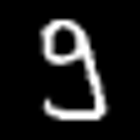

Respuesta de la IA:
3
Resultado esperado: 
9

Error N° 171:


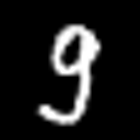

Respuesta de la IA:
3
Resultado esperado: 
9

Error N° 172:


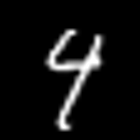

Respuesta de la IA:
9
Resultado esperado: 
4

Error N° 173:


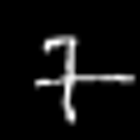

Respuesta de la IA:
2
Resultado esperado: 
7

Error N° 174:


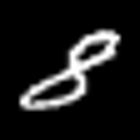

Respuesta de la IA:
3
Resultado esperado: 
8

Error N° 175:


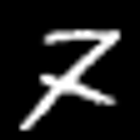

Respuesta de la IA:
2
Resultado esperado: 
7

Error N° 176:


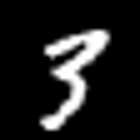

Respuesta de la IA:
9
Resultado esperado: 
3

Error N° 177:


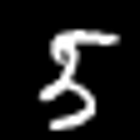

Respuesta de la IA:
8
Resultado esperado: 
5

Error N° 178:


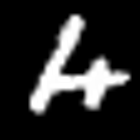

Respuesta de la IA:
2
Resultado esperado: 
4

Error N° 179:


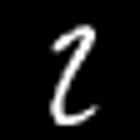

Respuesta de la IA:
8
Resultado esperado: 
2

Error N° 180:


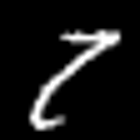

Respuesta de la IA:
3
Resultado esperado: 
7

Error N° 181:


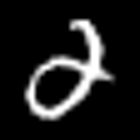

Respuesta de la IA:
3
Resultado esperado: 
2

Error N° 182:


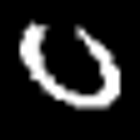

Respuesta de la IA:
6
Resultado esperado: 
0

Error N° 183:


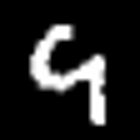

Respuesta de la IA:
4
Resultado esperado: 
9

Error N° 184:


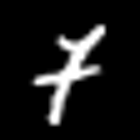

Respuesta de la IA:
1
Resultado esperado: 
7

Error N° 185:


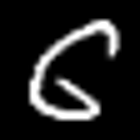

Respuesta de la IA:
5
Resultado esperado: 
6

Error N° 186:


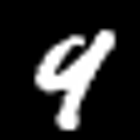

Respuesta de la IA:
4
Resultado esperado: 
9

Error N° 187:


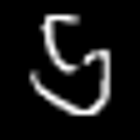

Respuesta de la IA:
6
Resultado esperado: 
5

Error N° 188:


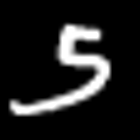

Respuesta de la IA:
3
Resultado esperado: 
5

Error N° 189:


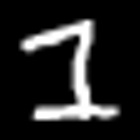

Respuesta de la IA:
3
Resultado esperado: 
1

Error N° 190:


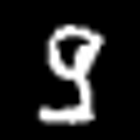

Respuesta de la IA:
3
Resultado esperado: 
9

Error N° 191:


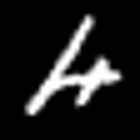

Respuesta de la IA:
6
Resultado esperado: 
4

Error N° 192:


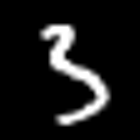

Respuesta de la IA:
5
Resultado esperado: 
3

Error N° 193:


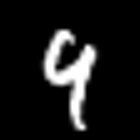

Respuesta de la IA:
4
Resultado esperado: 
9

Error N° 194:


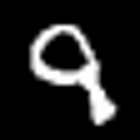

Respuesta de la IA:
4
Resultado esperado: 
9

Error N° 195:


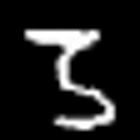

Respuesta de la IA:
2
Resultado esperado: 
3

Error N° 196:


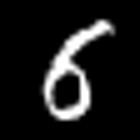

Respuesta de la IA:
5
Resultado esperado: 
6

Error N° 197:


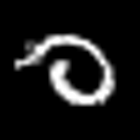

Respuesta de la IA:
9
Resultado esperado: 
0

Error N° 198:


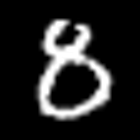

Respuesta de la IA:
0
Resultado esperado: 
8

Error N° 199:


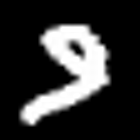

Respuesta de la IA:
3
Resultado esperado: 
9

Error N° 200:


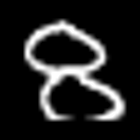

Respuesta de la IA:
2
Resultado esperado: 
8

Error N° 201:


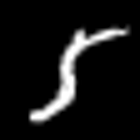

Respuesta de la IA:
1
Resultado esperado: 
5

Error N° 202:


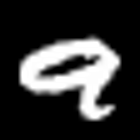

Respuesta de la IA:
4
Resultado esperado: 
9

Error N° 203:


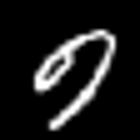

Respuesta de la IA:
0
Resultado esperado: 
9

Error N° 204:


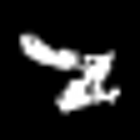

Respuesta de la IA:
7
Resultado esperado: 
2

Error N° 205:


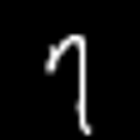

Respuesta de la IA:
9
Resultado esperado: 
7

Error N° 206:


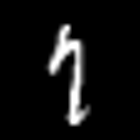

Respuesta de la IA:
7
Resultado esperado: 
1

Error N° 207:


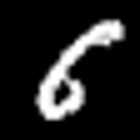

Respuesta de la IA:
5
Resultado esperado: 
6

Error N° 208:


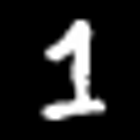

Respuesta de la IA:
3
Resultado esperado: 
1

Error N° 209:


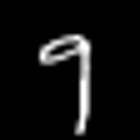

Respuesta de la IA:
7
Resultado esperado: 
9

Error N° 210:


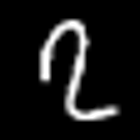

Respuesta de la IA:
8
Resultado esperado: 
2

Error N° 211:


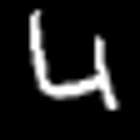

Respuesta de la IA:
6
Resultado esperado: 
4

Error N° 212:


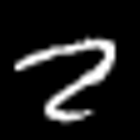

Respuesta de la IA:
8
Resultado esperado: 
2

Error N° 213:


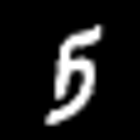

Respuesta de la IA:
9
Resultado esperado: 
5

Error N° 214:


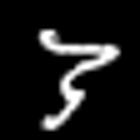

Respuesta de la IA:
7
Resultado esperado: 
3

Error N° 215:


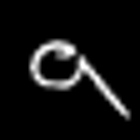

Respuesta de la IA:
2
Resultado esperado: 
9

Error N° 216:


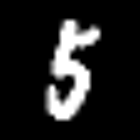

Respuesta de la IA:
8
Resultado esperado: 
5

Error N° 217:


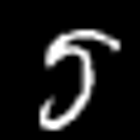

Respuesta de la IA:
7
Resultado esperado: 
5

Error N° 218:


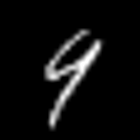

Respuesta de la IA:
4
Resultado esperado: 
9

Error N° 219:


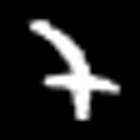

Respuesta de la IA:
3
Resultado esperado: 
7

Error N° 220:


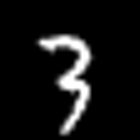

Respuesta de la IA:
7
Resultado esperado: 
3

Error N° 221:


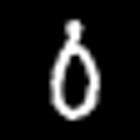

Respuesta de la IA:
6
Resultado esperado: 
0

Error N° 222:


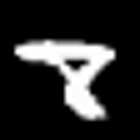

Respuesta de la IA:
7
Resultado esperado: 
8

Error N° 223:


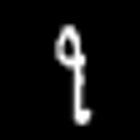

Respuesta de la IA:
1
Resultado esperado: 
9

Error N° 224:


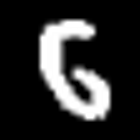

Respuesta de la IA:
5
Resultado esperado: 
6

Error N° 225:


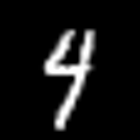

Respuesta de la IA:
9
Resultado esperado: 
4

Error N° 226:


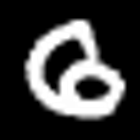

Respuesta de la IA:
2
Resultado esperado: 
6

Error N° 227:


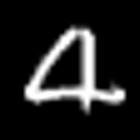

Respuesta de la IA:
9
Resultado esperado: 
4

Error N° 228:


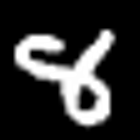

Respuesta de la IA:
4
Resultado esperado: 
8

Error N° 229:


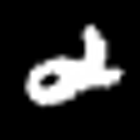

Respuesta de la IA:
4
Resultado esperado: 
2

Error N° 230:


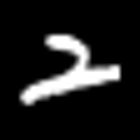

Respuesta de la IA:
7
Resultado esperado: 
2

Error N° 231:


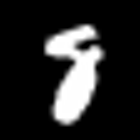

Respuesta de la IA:
7
Resultado esperado: 
8

Error N° 232:


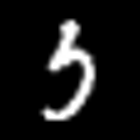

Respuesta de la IA:
5
Resultado esperado: 
3

Error N° 233:


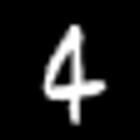

Respuesta de la IA:
6
Resultado esperado: 
4

Error N° 234:


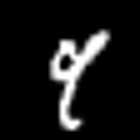

Respuesta de la IA:
8
Resultado esperado: 
9

Error N° 235:


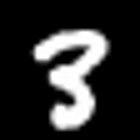

Respuesta de la IA:
8
Resultado esperado: 
3

Error N° 236:


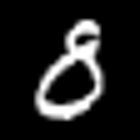

Respuesta de la IA:
3
Resultado esperado: 
8

Error N° 237:


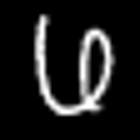

Respuesta de la IA:
0
Resultado esperado: 
6

Error N° 238:


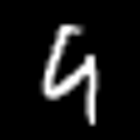

Respuesta de la IA:
4
Resultado esperado: 
9

Error N° 239:


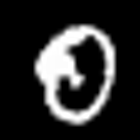

Respuesta de la IA:
8
Resultado esperado: 
0

Error N° 240:


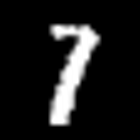

Respuesta de la IA:
1
Resultado esperado: 
7

Error N° 241:


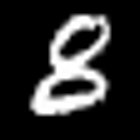

Respuesta de la IA:
6
Resultado esperado: 
8

Error N° 242:


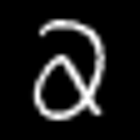

Respuesta de la IA:
3
Resultado esperado: 
2

Error N° 243:


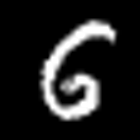

Respuesta de la IA:
5
Resultado esperado: 
6

Error N° 244:


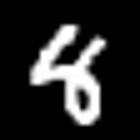

Respuesta de la IA:
4
Resultado esperado: 
8

Error N° 245:


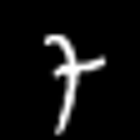

Respuesta de la IA:
1
Resultado esperado: 
7

Error N° 246:


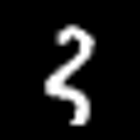

Respuesta de la IA:
2
Resultado esperado: 
3

Error N° 247:


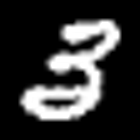

Respuesta de la IA:
8
Resultado esperado: 
3

Error N° 248:


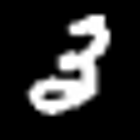

Respuesta de la IA:
8
Resultado esperado: 
3

Error N° 249:


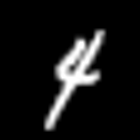

Respuesta de la IA:
1
Resultado esperado: 
4

Error N° 250:


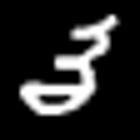

Respuesta de la IA:
8
Resultado esperado: 
3

Error N° 251:


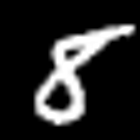

Respuesta de la IA:
5
Resultado esperado: 
8

Error N° 252:


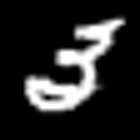

Respuesta de la IA:
6
Resultado esperado: 
3

Error N° 253:


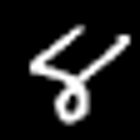

Respuesta de la IA:
4
Resultado esperado: 
8

Error N° 254:


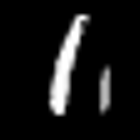

Respuesta de la IA:
6
Resultado esperado: 
1

Error N° 255:


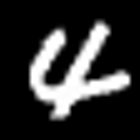

Respuesta de la IA:
2
Resultado esperado: 
4

Error N° 256:


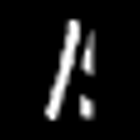

Respuesta de la IA:
8
Resultado esperado: 
1

Error N° 257:


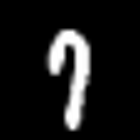

Respuesta de la IA:
9
Resultado esperado: 
7

Error N° 258:


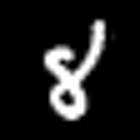

Respuesta de la IA:
4
Resultado esperado: 
8

Error N° 259:


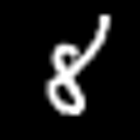

Respuesta de la IA:
6
Resultado esperado: 
8

Error N° 260:


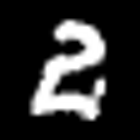

Respuesta de la IA:
3
Resultado esperado: 
2

Error N° 261:


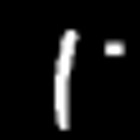

Respuesta de la IA:
5
Resultado esperado: 
1

Error N° 262:


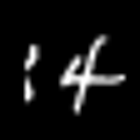

Respuesta de la IA:
3
Resultado esperado: 
4

Error N° 263:


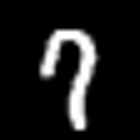

Respuesta de la IA:
9
Resultado esperado: 
7

Error N° 264:


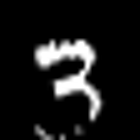

Respuesta de la IA:
7
Resultado esperado: 
3

Error N° 265:


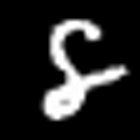

Respuesta de la IA:
6
Resultado esperado: 
8

Error N° 266:


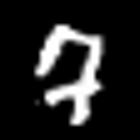

Respuesta de la IA:
9
Resultado esperado: 
7

Error N° 267:


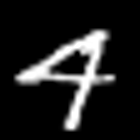

Respuesta de la IA:
7
Resultado esperado: 
4

Error N° 268:


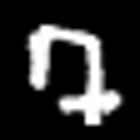

Respuesta de la IA:
5
Resultado esperado: 
7

Error N° 269:


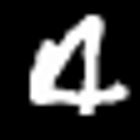

Respuesta de la IA:
0
Resultado esperado: 
4

Error N° 270:


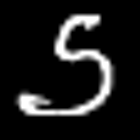

Respuesta de la IA:
3
Resultado esperado: 
5

Error N° 271:


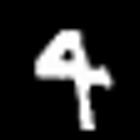

Respuesta de la IA:
9
Resultado esperado: 
4

Error N° 272:


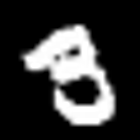

Respuesta de la IA:
8
Resultado esperado: 
3

Error N° 273:


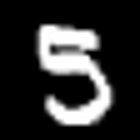

Respuesta de la IA:
3
Resultado esperado: 
5

Error N° 274:


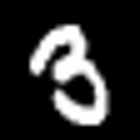

Respuesta de la IA:
8
Resultado esperado: 
3

Error N° 275:


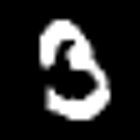

Respuesta de la IA:
5
Resultado esperado: 
3

Error N° 276:


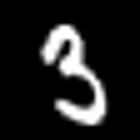

Respuesta de la IA:
5
Resultado esperado: 
3

Error N° 277:


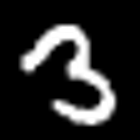

Respuesta de la IA:
9
Resultado esperado: 
3

Error N° 278:


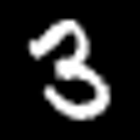

Respuesta de la IA:
8
Resultado esperado: 
3

Error N° 279:


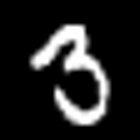

Respuesta de la IA:
9
Resultado esperado: 
3

Error N° 280:


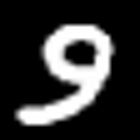

Respuesta de la IA:
3
Resultado esperado: 
9

Error N° 281:


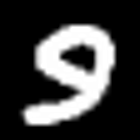

Respuesta de la IA:
3
Resultado esperado: 
9

Error N° 282:


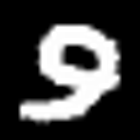

Respuesta de la IA:
3
Resultado esperado: 
9

Error N° 283:


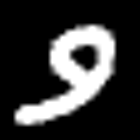

Respuesta de la IA:
3
Resultado esperado: 
9

Error N° 284:


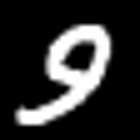

Respuesta de la IA:
3
Resultado esperado: 
9

Error N° 285:


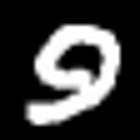

Respuesta de la IA:
8
Resultado esperado: 
9

Error N° 286:


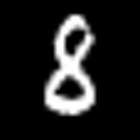

Respuesta de la IA:
6
Resultado esperado: 
8

Error N° 287:


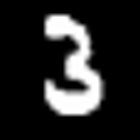

Respuesta de la IA:
2
Resultado esperado: 
3

Error N° 288:


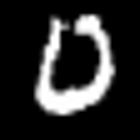

Respuesta de la IA:
6
Resultado esperado: 
0

Error N° 289:


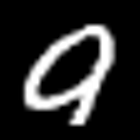

Respuesta de la IA:
0
Resultado esperado: 
9

Error N° 290:


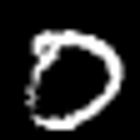

Respuesta de la IA:
7
Resultado esperado: 
0

Error N° 291:


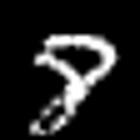

Respuesta de la IA:
9
Resultado esperado: 
8

Error N° 292:


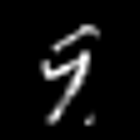

Respuesta de la IA:
4
Resultado esperado: 
9

Error N° 293:


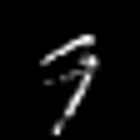

Respuesta de la IA:
7
Resultado esperado: 
9

Error N° 294:


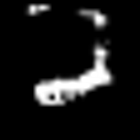

Respuesta de la IA:
6
Resultado esperado: 
2

Error N° 295:


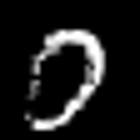

Respuesta de la IA:
7
Resultado esperado: 
0

Error N° 296:


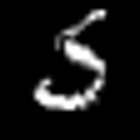

Respuesta de la IA:
3
Resultado esperado: 
5

Error N° 297:


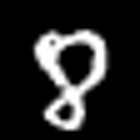

Respuesta de la IA:
7
Resultado esperado: 
8

Error N° 298:


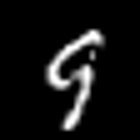

Respuesta de la IA:
5
Resultado esperado: 
9

Error N° 299:


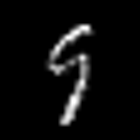

Respuesta de la IA:
5
Resultado esperado: 
9

Error N° 300:


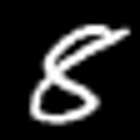

Respuesta de la IA:
5
Resultado esperado: 
8

Error N° 301:


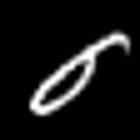

Respuesta de la IA:
5
Resultado esperado: 
0

Error N° 302:


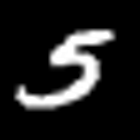

Respuesta de la IA:
9
Resultado esperado: 
5

Error N° 303:


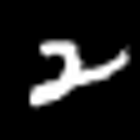

Respuesta de la IA:
8
Resultado esperado: 
2

Error N° 304:


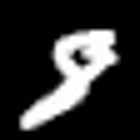

Respuesta de la IA:
7
Resultado esperado: 
8

Error N° 305:


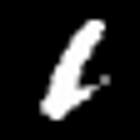

Respuesta de la IA:
6
Resultado esperado: 
1

Error N° 306:


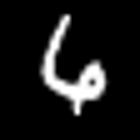

Respuesta de la IA:
4
Resultado esperado: 
6

Error N° 307:


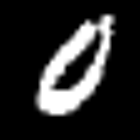

Respuesta de la IA:
6
Resultado esperado: 
0

Error N° 308:


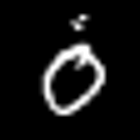

Respuesta de la IA:
3
Resultado esperado: 
0

Error N° 309:


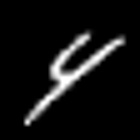

Respuesta de la IA:
8
Resultado esperado: 
4

Error N° 310:


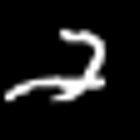

Respuesta de la IA:
7
Resultado esperado: 
2

Error N° 311:


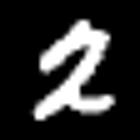

Respuesta de la IA:
8
Resultado esperado: 
2

Error N° 312:


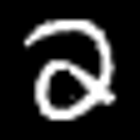

Respuesta de la IA:
0
Resultado esperado: 
2

Error N° 313:


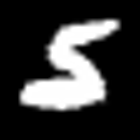

Respuesta de la IA:
6
Resultado esperado: 
5

Error N° 314:


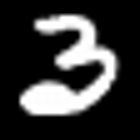

Respuesta de la IA:
2
Resultado esperado: 
3

Error N° 315:


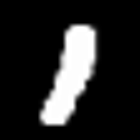

Respuesta de la IA:
8
Resultado esperado: 
1

Error N° 316:


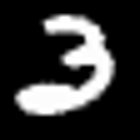

Respuesta de la IA:
2
Resultado esperado: 
3

Error N° 317:


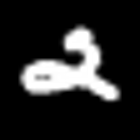

Respuesta de la IA:
4
Resultado esperado: 
2

Error N° 318:


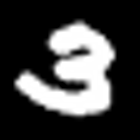

Respuesta de la IA:
2
Resultado esperado: 
3

Error N° 319:


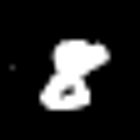

Respuesta de la IA:
6
Resultado esperado: 
8

Error N° 320:


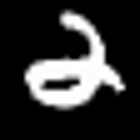

Respuesta de la IA:
6
Resultado esperado: 
2

Error N° 321:


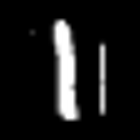

Respuesta de la IA:
8
Resultado esperado: 
1

Error N° 322:


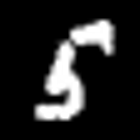

Respuesta de la IA:
8
Resultado esperado: 
5

Error N° 323:


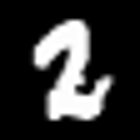

Respuesta de la IA:
8
Resultado esperado: 
2

Error N° 324:


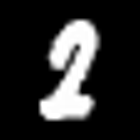

Respuesta de la IA:
8
Resultado esperado: 
2

Error N° 325:


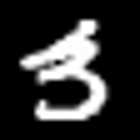

Respuesta de la IA:
8
Resultado esperado: 
3

Error N° 326:


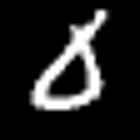

Respuesta de la IA:
6
Resultado esperado: 
0

Error N° 327:


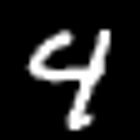

Respuesta de la IA:
9
Resultado esperado: 
4

Error N° 328:


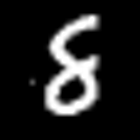

Respuesta de la IA:
6
Resultado esperado: 
8

Error N° 329:


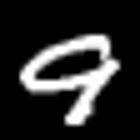

Respuesta de la IA:
4
Resultado esperado: 
9

Error N° 330:


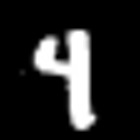

Respuesta de la IA:
9
Resultado esperado: 
4

Error N° 331:


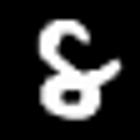

Respuesta de la IA:
6
Resultado esperado: 
8

Error N° 332:


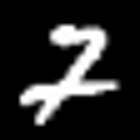

Respuesta de la IA:
2
Resultado esperado: 
7

Error N° 333:


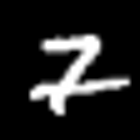

Respuesta de la IA:
2
Resultado esperado: 
7

Error N° 334:


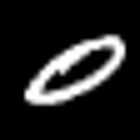

Respuesta de la IA:
5
Resultado esperado: 
0

Error N° 335:


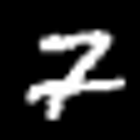

Respuesta de la IA:
2
Resultado esperado: 
7

Error N° 336:


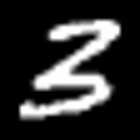

Respuesta de la IA:
2
Resultado esperado: 
3

Error N° 337:


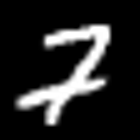

Respuesta de la IA:
2
Resultado esperado: 
7

Error N° 338:


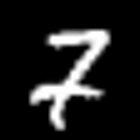

Respuesta de la IA:
2
Resultado esperado: 
7

Error N° 339:


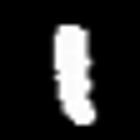

Respuesta de la IA:
8
Resultado esperado: 
1

Error N° 340:


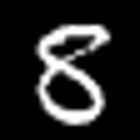

Respuesta de la IA:
5
Resultado esperado: 
8

Error N° 341:


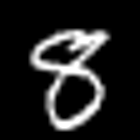

Respuesta de la IA:
9
Resultado esperado: 
8

Error N° 342:


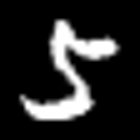

Respuesta de la IA:
3
Resultado esperado: 
5

Error N° 343:


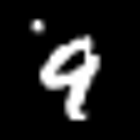

Respuesta de la IA:
4
Resultado esperado: 
9

Error N° 344:


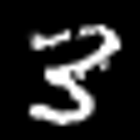

Respuesta de la IA:
8
Resultado esperado: 
3

Error N° 345:


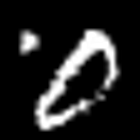

Respuesta de la IA:
3
Resultado esperado: 
0

Error N° 346:


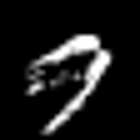

Respuesta de la IA:
7
Resultado esperado: 
9

Error N° 347:


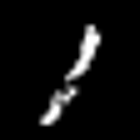

Respuesta de la IA:
7
Resultado esperado: 
1

Error N° 348:


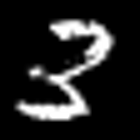

Respuesta de la IA:
2
Resultado esperado: 
3

Error N° 349:


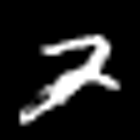

Respuesta de la IA:
7
Resultado esperado: 
2

Error N° 350:


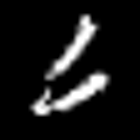

Respuesta de la IA:
5
Resultado esperado: 
6

Error N° 351:


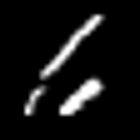

Respuesta de la IA:
5
Resultado esperado: 
6

Error N° 352:


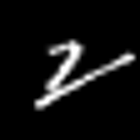

Respuesta de la IA:
8
Resultado esperado: 
2

Error N° 353:


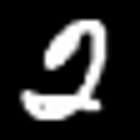

Respuesta de la IA:
5
Resultado esperado: 
2

Error N° 354:


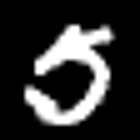

Respuesta de la IA:
0
Resultado esperado: 
5

Error N° 355:


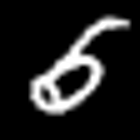

Respuesta de la IA:
6
Resultado esperado: 
5

Error N° 356:


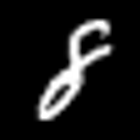

Respuesta de la IA:
1
Resultado esperado: 
8

Error N° 357:


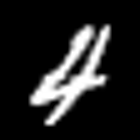

Respuesta de la IA:
2
Resultado esperado: 
4

Error N° 358:


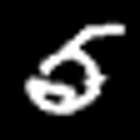

Respuesta de la IA:
6
Resultado esperado: 
5

Error N° 359:


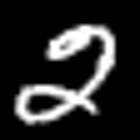

Respuesta de la IA:
0
Resultado esperado: 
2

Error N° 360:


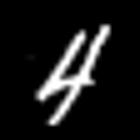

Respuesta de la IA:
8
Resultado esperado: 
4

Error N° 361:


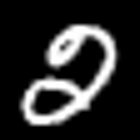

Respuesta de la IA:
0
Resultado esperado: 
2

Error N° 362:


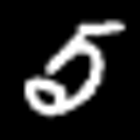

Respuesta de la IA:
0
Resultado esperado: 
5

Error N° 363:


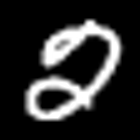

Respuesta de la IA:
0
Resultado esperado: 
2

Error N° 364:


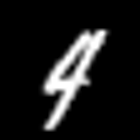

Respuesta de la IA:
9
Resultado esperado: 
4

Error N° 365:


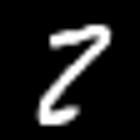

Respuesta de la IA:
8
Resultado esperado: 
2

Error N° 366:


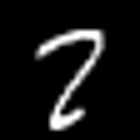

Respuesta de la IA:
7
Resultado esperado: 
2

Error N° 367:


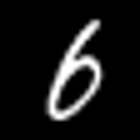

Respuesta de la IA:
8
Resultado esperado: 
6

Error N° 368:


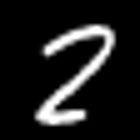

Respuesta de la IA:
8
Resultado esperado: 
2

Error N° 369:


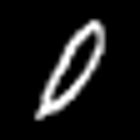

Respuesta de la IA:
6
Resultado esperado: 
0

Error N° 370:


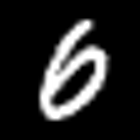

Respuesta de la IA:
0
Resultado esperado: 
6

Error N° 371:


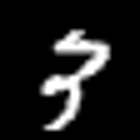

Respuesta de la IA:
7
Resultado esperado: 
3

Error N° 372:


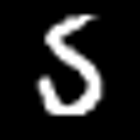

Respuesta de la IA:
6
Resultado esperado: 
5

Error N° 373:


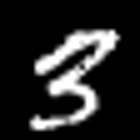

Respuesta de la IA:
9
Resultado esperado: 
3

Error N° 374:


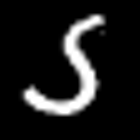

Respuesta de la IA:
3
Resultado esperado: 
5

Error N° 375:


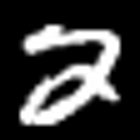

Respuesta de la IA:
3
Resultado esperado: 
2

Error N° 376:


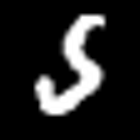

Respuesta de la IA:
6
Resultado esperado: 
5


Se equivoco: 376 veces
Hecho


In [ ]:
print("Buscar casos erroneos")
print()
counter = 0
for i in range(10000):
  # lo que predijo la IA
  predict = model.predict_on_batch(test_inputs[i].T).argmax()
  # lo que deberia ser
  expected_output = test_outputs[i].argmax()
  # detectar caso erroneo
  if predict != expected_output:
    counter += 1
    print("Error N° " +str(counter) + ":")
    # convertir el input a imagen
    display(Image.fromarray((test_data[0][i]).astype(np.uint8)).resize((140,140)))
    print("Respuesta de la IA:")
    print(predict)
    print("Resultado esperado: ")
    print(expected_output)
    print()
print()
print("Se equivoco: " + str(counter) + " veces")
print("Hecho")

De 10000 casos, la IA se equivoco 376 veces

$(376/10000) = 0.0376$

Esto representa un margen de error del 3.76%.